lists is:

{1: {'weight': 1}, 4: {'weight': 1}, 5: {'weight': 1}}
{0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1}
labels array is: 

[array([1, 1, 1, 1, 1, 1])]
labels[i] =  [1 1 1 1 1 1]
lists[i][v] =  {1: {'weight': 1}, 4: {'weight': 1}, 5: {'weight': 1}} type is =  <class 'networkx.classes.coreviews.AtlasView'>
Long Label is:  [1 1 1 1]
labels[i] =  [1 1 1 1 1 1]
lists[i][v] =  {0: {'weight': 1}, 2: {'weight': 1}, 5: {'weight': 1}, 3: {'weight': 1}} type is =  <class 'networkx.classes.coreviews.AtlasView'>
Long Label is:  [1 1 1 1 1]
labels[i] =  [1 1 1 1 1 1]
lists[i][v] =  {1: {'weight': 1}, 5: {'weight': 1}} type is =  <class 'networkx.classes.coreviews.AtlasView'>
Long Label is:  [1 1 1]
labels[i] =  [1 1 1 1 1 1]
lists[i][v] =  {1: {'weight': 1}, 4: {'weight': 1}} type is =  <class 'networkx.classes.coreviews.AtlasView'>
Long Label is:  [1 1 1]
labels[i] =  [1 1 1 1 1 1]
lists[i][v] =  {0: {'weight': 1}, 3: {'weight': 1}, 5: {'weight': 1}} type is =  <class 'networkx.classes.coreviews.Atl

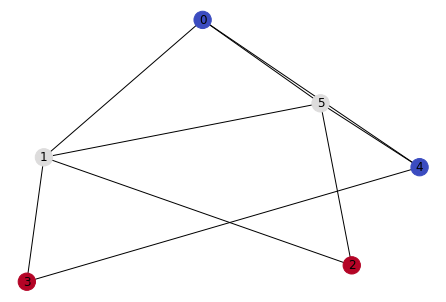

In [1]:
#Credits to "svegapons" for the base code "gk_wl.py".
#This code has been modified to work with the latest version of networkx, and print the graph with the updated labels.
#Possible bug! This code might fail for a graph with two vertices. But a simple workaround is to hardcode this case.

import pandas as pd
import numpy as np
import networkx as nx
import copy
import pdb
import matplotlib as mpl
from matplotlib import pyplot as plt

def compare_pairwise(th, h, graph_list, normalize=True):
    """Compute the all-pairs kernel values for a list of graphs.    

    Parameters
    ----------
    graph_list: list of ndarray
                A list of graphs (adjacency matrices)

    Return
    ------
    K: ndarray, shape = (len(graph_list), len(graph_list))
        The similarity matrix of all graphs in graph_list.
    """
    #Thresholding and computing the networkx graphs
#     graph_list = [nx.from_numpy_matrix(np.where(mat > th, 1, 0)) 
#                   for mat in graph_list]
    n = len(graph_list)
    lists = [0] * n
    k = [0]*(h + 1)
    n_nodes = 0
    n_max = 0

    #Compute adjacency lists and n_nodes, the total number of nodes in
    #the dataset.
    for i in range(n):
        #the graph should be a networkx graph or having the same methods.
        lists[i] = graph_list[i]
        n_nodes = n_nodes + graph_list[i].number_of_nodes()

        #Computing the maximum number of nodes in the graphs. It will be 
        #used in the computation of vectorial representation.
        if(n_max < graph_list[i].number_of_nodes()):
            n_max = graph_list[i].number_of_nodes()
    print("lists is:\n")
    print(lists[0][0])
    
    phi = np.zeros((n_max, n))
    #each column j of phi will be the explicit feature representation
    # for the graph j.
    #n_max is enough to store all possible labels

    #INITIALIZATION
    #initialize the nodes labels for each graph with their labels or 
    #with degrees (for unlabeled graphs)

    labels = [0] * n
    label_lookup = {}
    label_counter = 0

    # label_lookup is an associative array, which will contain the
    # mapping from multiset labels (strings) to short labels (integers)

    #Node degrees are used as node labels
    for i in range(n):
        labels[i] = np.array([1]*len(graph_list[i]))
#         labels[i] = np.array(list(dict(graph_list[i].degree()).values()))
        color_lookup = {k:v for k, v in enumerate([1]*len(graph_list[i]))}
#         color_lookup = {k:v for k, v in enumerate(((list(dict(graph_list[i].degree()).values()))))}
        print(color_lookup)
        low, *_, high = sorted(color_lookup.values())
        norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
        mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
#         nx.draw(graph_list[i], 
#                 nodelist=color_lookup,
#                 node_color=[mapper.to_rgba(i) 
#                             for i in color_lookup.values()], 
#                 with_labels=True)
        for j in range(len(labels[i])):
            phi[labels[i][j], i] += 1
#     print(labels[1])
    k = np.dot(phi.transpose(), phi)
    print("labels array is: \n")
    print(labels)
    ### MAIN LOOP
    it = 0
    new_labels = copy.deepcopy(labels)

    z = np.array([1])
#     print("labels[1][lists[1][0]]", labels[1][lists[1][0]])
    while it < h:
        # create an empty lookup table
        label_lookup = {}
        label_counter = 0

        phi = np.zeros((n_nodes, n))
        for i in range(n):
            for v in range(len(lists[i])):
                # form a multiset label of the node v of the i'th graph
                # and convert it to a string
#                    pdb.set_trace()
#                 print("labels[i] = ", labels[i])
#                 print("lists[i][v] = ", lists[i][v], "type is = ", type(lists[i][v]))
#                 print("np.sort(", lists[i][v], labels[i][lists[i][v]],")")
#                 print(type(labels[i][lists[i][v]]))
                long_label = np.concatenate((np.array([labels[i][v]]),np.sort(labels[i][lists[i][v]])))
                long_label_string = str(long_label)
                print("Long Label is: ", long_label_string)
                # if the multiset label has not yet occurred, add it to the
                # lookup table and assign a number to it
                if long_label_string in label_lookup:
                    new_labels[i][v] = label_lookup[long_label_string]
                else:
                    label_lookup[long_label_string] = label_counter
                    new_labels[i][v] = label_counter
                    label_counter += 1
            print(label_lookup)
            print(new_labels[i])
            if(it==h-1):
                color_lookup = {k:v for k, v in enumerate(new_labels[i])}
                print(color_lookup)
                low, *_, high = sorted(color_lookup.values())
                norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
                mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
                nx.draw(graph_list[i], 
                        nodelist=color_lookup,
                        node_color=[mapper.to_rgba(i) 
                                    for i in color_lookup.values()], 
                        with_labels=True)          
                    
            # fill the column for i'th graph in phi
            aux = np.bincount(new_labels[i])
            phi[new_labels[i], i] += aux[new_labels[i]]

        k += np.dot(phi.transpose(), phi)
        labels = copy.deepcopy(new_labels)
        it = it + 1
    return 1
C = []

A = np.array([[0,1,0,0,1,1],[0,0,1,0,0,1],[0,0,0,0,0,1],[0,1,0,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0]])
Z = nx.from_numpy_matrix(A, parallel_edges = False)
B = Z.to_undirected()

C.append(B)

# A = np.array([[0,1,1,1],[0,0,1,0],[0,0,0,0],[0,0,0,0]])
# Z = nx.from_numpy_matrix(A, parallel_edges = False)
# B = Z.to_undirected()
# C.append(B)

X=compare_pairwise(0, 1, C, normalize=True)
print(X)
# def compare_paiwise(graph_list, normalize=True):
#     graph_list = 

# A = np.ones(5)
# print(A)

[(0, 3), (1, 4), (2, 2), (3, 2), (4, 3), (5, 4)]
{0: 3, 1: 4, 2: 2, 3: 2, 4: 3, 5: 4}
[3, 4, 2, 2, 3, 4]
Hi


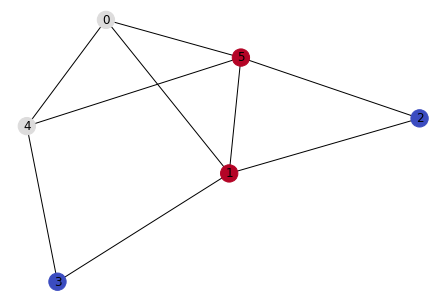

In [4]:
# To test printing graphs in NetworkX

import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import networkx as nx
import copy
import pdb

A = np.array([[0,1,0,0,1,1],[0,0,1,0,0,1],[0,1,0,0,0,1],[0,1,0,0,1,0],[0,0,0,1,0,0],[0,0,0,0,1,0]])
Z = nx.from_numpy_matrix(A, parallel_edges = False)
B = Z.to_undirected()
print(B.degree())
color_lookup = {k:v for k, v in enumerate(((list(dict(B.degree()).values()))))}
print(color_lookup)
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)
nx.draw(B, 
        nodelist=color_lookup,
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=True)

# nx.draw(B)
X = B.degree()
print(list(dict(X).values()))
print("Hi")
print(B.adjacency())
